<a href="https://colab.research.google.com/github/DevBatra05/AIML_Sem_4/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np

# Step 2: Load the datasets
from google.colab import files
ss=files.upload()
reliance_df = pd.read_csv('RILO - Copy.csv')
from google.colab import files
ss=files.upload()
sbi_df = pd.read_csv('SBI Dataset.csv')

# Step 3: Preview the data
print("Reliance Dataset:")
print(reliance_df.head())

print("\nSBI Dataset:")
print(sbi_df.head())

# Step 4: Check for null/missing values
print("\nChecking missing values for Reliance:")
print(reliance_df.isnull().sum())

print("\nChecking missing values for SBI:")
print(sbi_df.isnull().sum())

# Step 5: Drop or fill missing values (if any)
reliance_df.dropna(inplace=True)
sbi_df.dropna(inplace=True)

# Step 6: Check data types
print("\nData types for Reliance:")
print(reliance_df.dtypes)

print("\nData types for SBI:")
print(sbi_df.dtypes)

# Step 7: Convert 'Date' column to datetime (if not already)
# Reliance date is already datetime
reliance_df['Date'] = pd.to_datetime(reliance_df['Date'], format='%d-%b-%y')

# Convert SBI dataset Date
sbi_df['Date'] = pd.to_datetime(sbi_df['Date'], errors='coerce')

# Drop rows where Date became NaT (invalid dates)
sbi_df = sbi_df.dropna(subset=['Date'])

# Now your SBI Date is fully cleaned
print("\nAfter cleaning, SBI dataset:")
print(sbi_df.dtypes)   # This should now show Date as datetime64[ns]


reliance_df.rename(columns={'Close Price': 'Close'}, inplace=True)

# Step 8: Sort data by date
reliance_df = reliance_df.sort_values('Date')
sbi_df = sbi_df.sort_values('Date')

# Step 9: Reset index after sorting
reliance_df.reset_index(drop=True, inplace=True)
sbi_df.reset_index(drop=True, inplace=True)

# Step 10: Feature Engineering - Creating Moving Averages
# Example: 5-day and 10-day moving average of Close price
reliance_df['MA5'] = reliance_df['Close'].rolling(window=5).mean()
reliance_df['MA10'] = reliance_df['Close'].rolling(window=10).mean()

sbi_df['MA5'] = sbi_df['Close'].rolling(window=5).mean()
sbi_df['MA10'] = sbi_df['Close'].rolling(window=10).mean()

# Final Preview
print("\nReliance Dataset after preprocessing:")
print(reliance_df.tail())

print("\nSBI Dataset after preprocessing:")
print(sbi_df.tail())


Saving RILO - Copy.csv to RILO - Copy (7).csv


Saving SBI Dataset.csv to SBI Dataset (8).csv
Reliance Dataset:
     Symbol Series      Date  Prev Close  Open Price  High Price  Low Price  \
0  RELIANCE     EQ  1-Jan-16     1014.60     1009.80      1018.9    1008.20   
1  RELIANCE     EQ  4-Jan-16     1015.35     1005.00      1013.8     986.70   
2  RELIANCE     EQ  5-Jan-16      995.30     1000.30      1010.0     997.00   
3  RELIANCE     EQ  6-Jan-16     1005.15     1007.60      1038.4    1000.40   
4  RELIANCE     EQ  7-Jan-16     1032.20     1021.05      1028.0    1008.05   

   Last Price  Close Price  Average Price  Total Traded Quantity  \
0      1013.6      1015.35        1015.52                1238135   
1       993.2       995.30         998.91                6896571   
2      1005.0      1005.15        1003.41                3416459   
3      1029.1      1032.20        1028.15                6116855   
4      1018.9      1013.25        1016.73                4512219   

       Turnover  No. of Trades  Deliverable Qty  % D

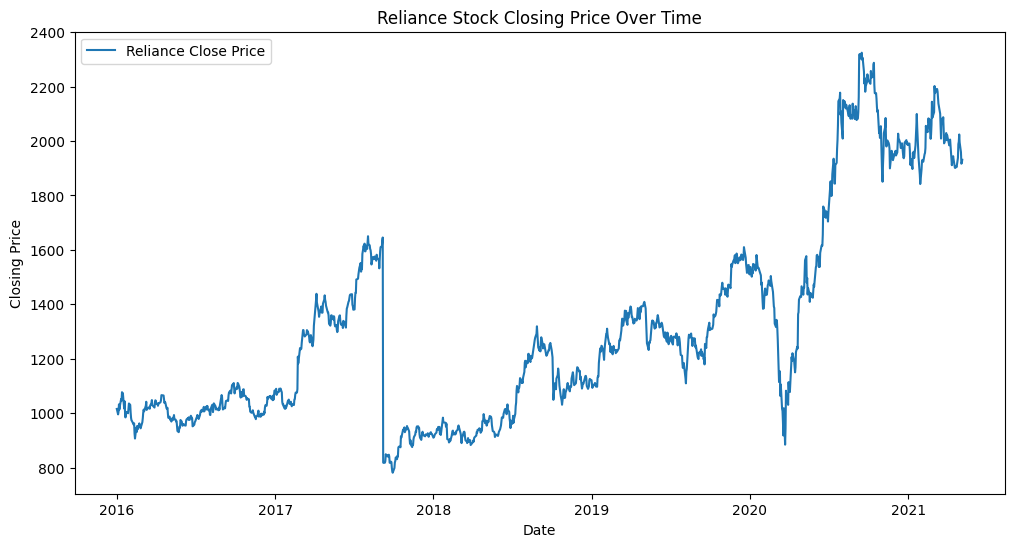

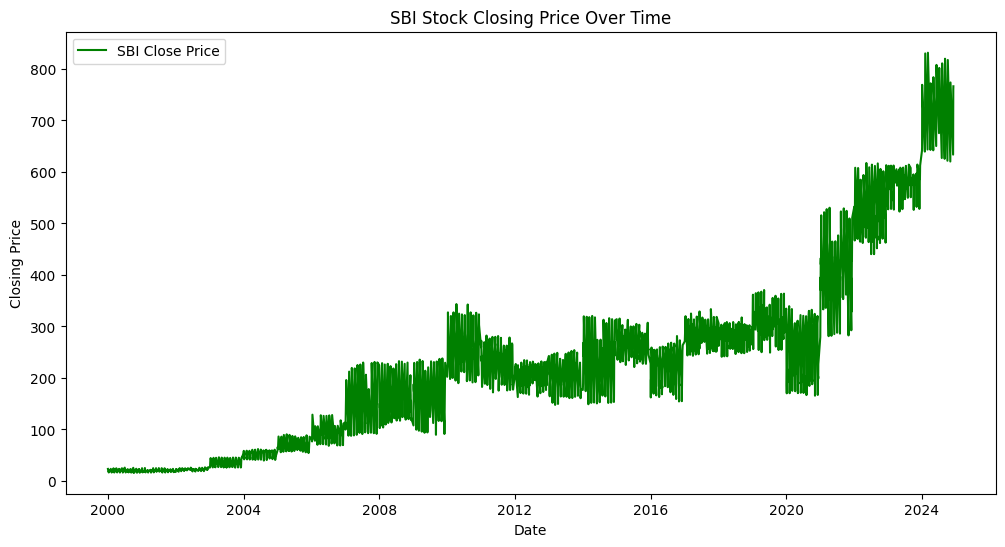

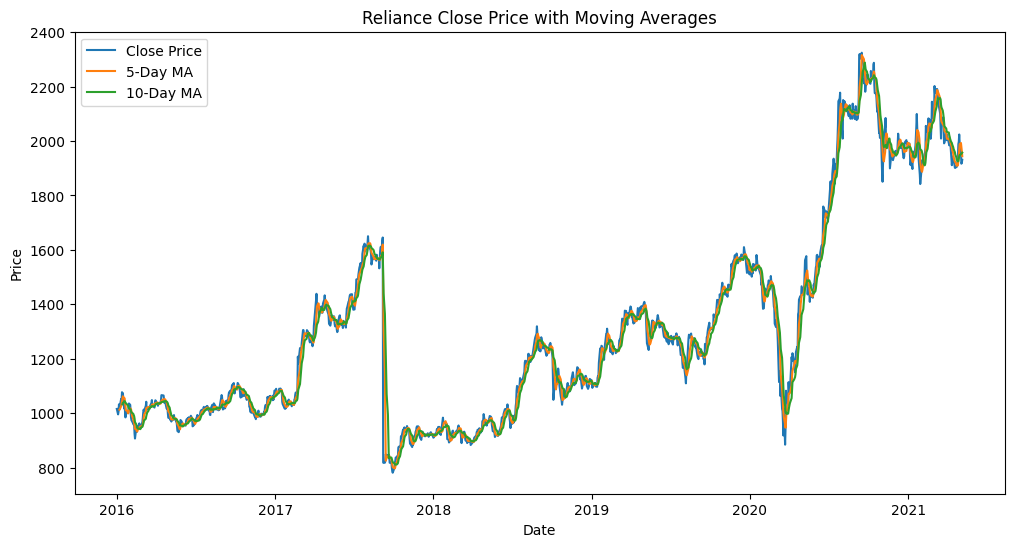

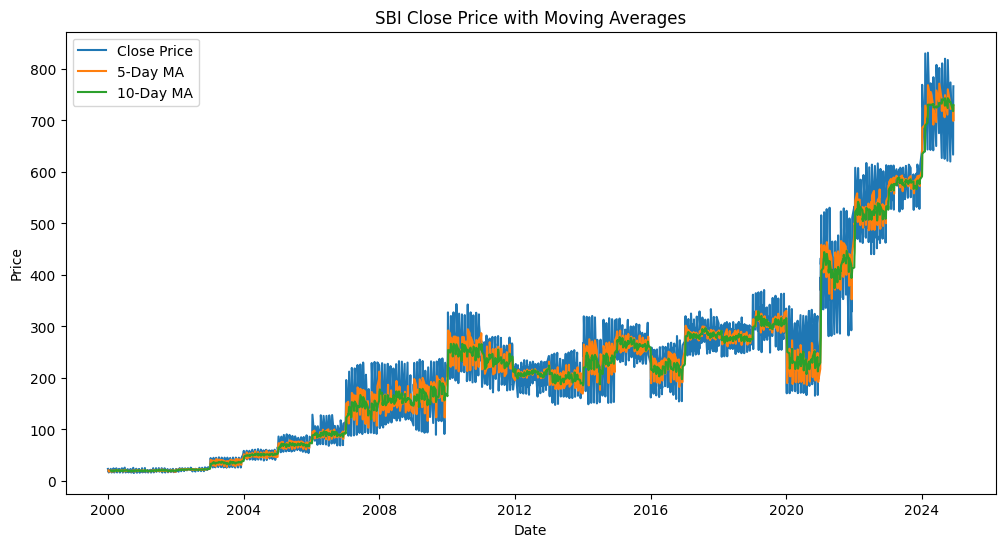


Reliance Correlation Matrix:
                       Open Price  High Price  Low Price     Close  \
Open Price               1.000000    0.998988   0.999062  0.998057   
High Price               0.998988    1.000000   0.998707  0.999257   
Low Price                0.999062    0.998707   1.000000  0.999145   
Close                    0.998057    0.999257   0.999145  1.000000   
Total Traded Quantity    0.412260    0.432771   0.400112  0.419357   

                       Total Traded Quantity  
Open Price                          0.412260  
High Price                          0.432771  
Low Price                           0.400112  
Close                               0.419357  
Total Traded Quantity               1.000000  

SBI Correlation Matrix:
            Open      High       Low     Close    Volume
Open    1.000000  0.999812  0.999754  0.999590 -0.038381
High    0.999812  1.000000  0.999703  0.999805 -0.032272
Low     0.999754  0.999703  1.000000  0.999822 -0.042794
Close   0.9995

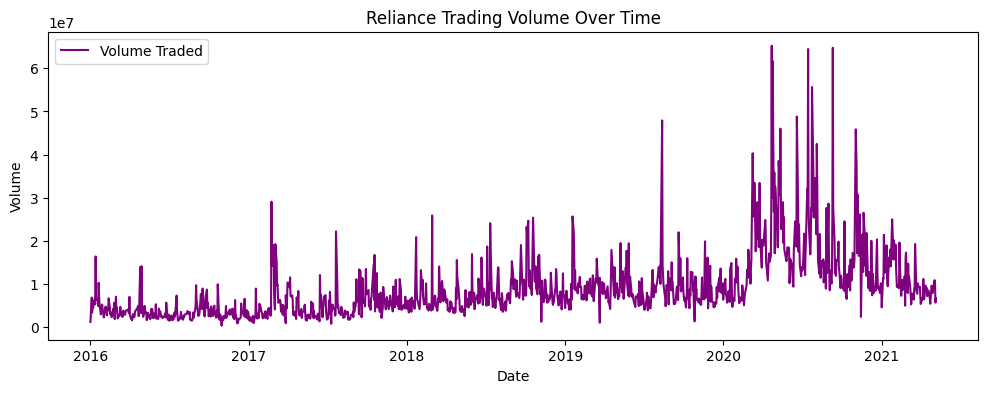

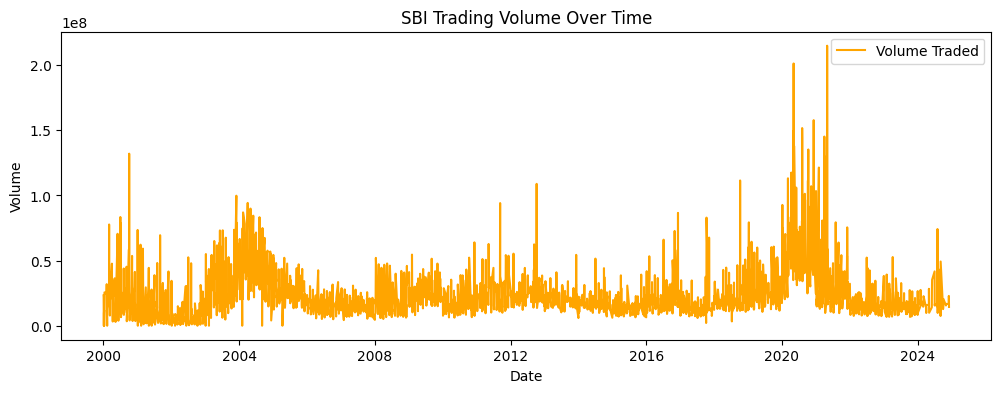

In [17]:
import matplotlib.pyplot as plt

# Plot for Reliance
plt.figure(figsize=(12,6))
plt.plot(reliance_df['Date'], reliance_df['Close'], label='Reliance Close Price')
plt.title('Reliance Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Plot for SBI
plt.figure(figsize=(12,6))
plt.plot(sbi_df['Date'], sbi_df['Close'], label='SBI Close Price', color='green')
plt.title('SBI Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Reliance - Moving Averages
plt.figure(figsize=(12,6))
plt.plot(reliance_df['Date'], reliance_df['Close'], label='Close Price')
plt.plot(reliance_df['Date'], reliance_df['MA5'], label='5-Day MA')
plt.plot(reliance_df['Date'], reliance_df['MA10'], label='10-Day MA')
plt.title('Reliance Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# SBI - Moving Averages
plt.figure(figsize=(12,6))
plt.plot(sbi_df['Date'], sbi_df['Close'], label='Close Price')
plt.plot(sbi_df['Date'], sbi_df['MA5'], label='5-Day MA')
plt.plot(sbi_df['Date'], sbi_df['MA10'], label='10-Day MA')
plt.title('SBI Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Reliance Correlation
print("\nReliance Correlation Matrix:")
print(reliance_df[['Open Price', 'High Price', 'Low Price', 'Close', 'Total Traded Quantity']].corr())

# SBI Correlation
print("\nSBI Correlation Matrix:")
print(sbi_df[['Open', 'High', 'Low', 'Close', 'Volume']].corr())

# Reliance Volume
plt.figure(figsize=(12,4))
plt.plot(reliance_df['Date'], reliance_df['Total Traded Quantity'], label='Volume Traded', color='purple')
plt.title('Reliance Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

# SBI Volume
plt.figure(figsize=(12,4))
plt.plot(sbi_df['Date'], sbi_df['Volume'], label='Volume Traded', color='orange')
plt.title('SBI Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()



In [21]:
# 0. Create Target column
reliance_df['Target'] = reliance_df['Close'].shift(-1)
reliance_df = reliance_df.dropna()

# 1. Import necessary ML libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# 2. Prepare features and target
features = ['Close', 'MA5', 'MA10']
X = reliance_df[features]
y = reliance_df['Target']

# 3. Split into Train and Test (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 4. Initialize models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
svr_model = SVR(kernel='rbf')

# 5. Train the models
linear_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)


SVR()

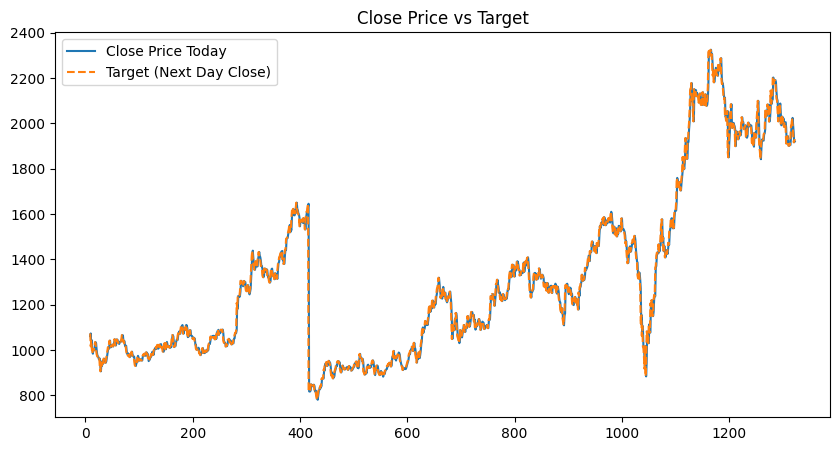

In [22]:
import matplotlib.pyplot as plt

# Plot actual Close vs Target to visually verify
plt.figure(figsize=(10,5))
plt.plot(reliance_df['Close'], label='Close Price Today')
plt.plot(reliance_df['Target'], label='Target (Next Day Close)', linestyle='--')
plt.title('Close Price vs Target')
plt.legend()
plt.show()


Model: Linear Regression
  - RMSE: 40.6256
  - MAE: 30.1939
  - R² Score: 0.9702
------------------------------
Model: Random Forest Regressor
  - RMSE: 663.3795
  - MAE: 602.1696
  - R² Score: -6.9401
------------------------------
Model: Support Vector Regressor
  - RMSE: 785.2981
  - MAE: 731.4002
  - R² Score: -10.1268
------------------------------


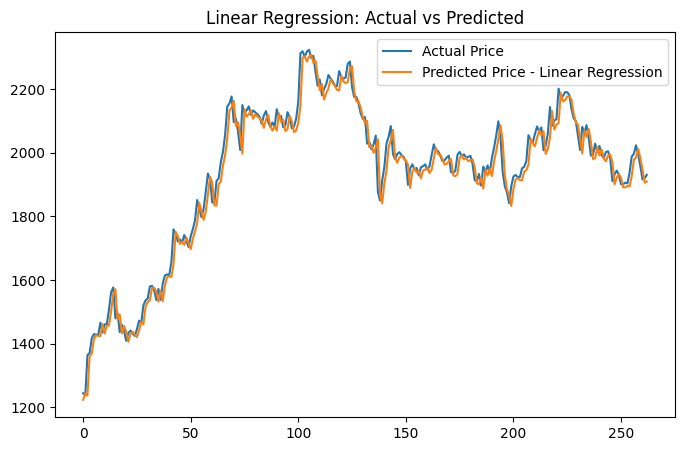

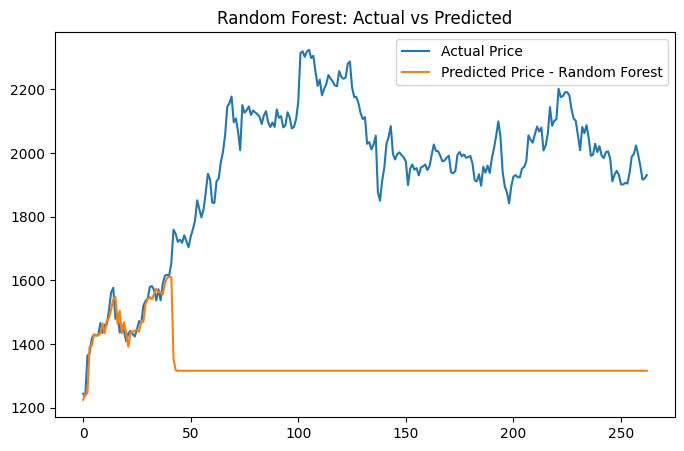

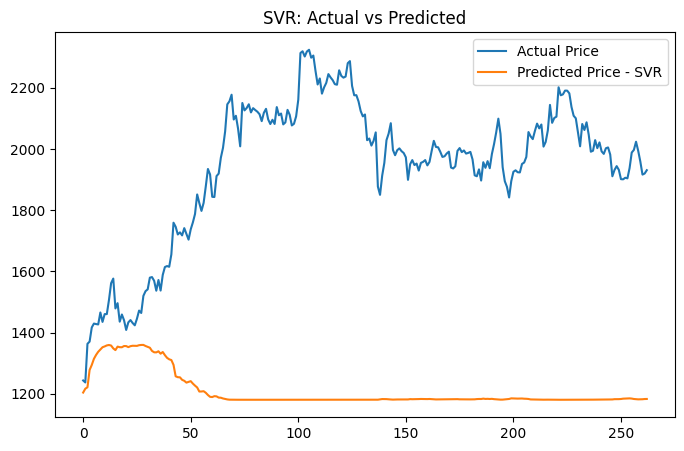

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Predict on Test Data
linear_pred = linear_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
svr_pred = svr_model.predict(X_test)

def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"Model: {model_name}")
    print(f"  - RMSE: {rmse:.4f}")
    print(f"  - MAE: {mae:.4f}")
    print(f"  - R² Score: {r2:.4f}")
    print("-"*30)
    return rmse, mae, r2

# Linear Regression
linear_scores = evaluate_model(y_test, linear_pred, "Linear Regression")

# Random Forest
rf_scores = evaluate_model(y_test, rf_pred, "Random Forest Regressor")

# Support Vector Regressor
svr_scores = evaluate_model(y_test, svr_pred, "Support Vector Regressor")

plt.figure(figsize=(8,5))
plt.plot(y_test.values, label='Actual Price')
plt.plot(linear_pred, label='Predicted Price - Linear Regression')
plt.legend()
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

plt.figure(figsize=(8,5))
plt.plot(y_test.values, label='Actual Price')
plt.plot(rf_pred, label='Predicted Price - Random Forest')
plt.legend()
plt.title('Random Forest: Actual vs Predicted')
plt.show()

plt.figure(figsize=(8,5))
plt.plot(y_test.values, label='Actual Price')
plt.plot(svr_pred, label='Predicted Price - SVR')
plt.legend()
plt.title('SVR: Actual vs Predicted')
plt.show()



In [24]:
import pandas as pd

# Create a dictionary with model performance
results = {
    'Model': ['Linear Regression', 'Random Forest', 'Support Vector Regressor'],
    'RMSE': [linear_scores[0], rf_scores[0], svr_scores[0]],
    'MAE': [linear_scores[1], rf_scores[1], svr_scores[1]],
    'R2 Score': [linear_scores[2], rf_scores[2], svr_scores[2]]
}

# Create a DataFrame
results_df = pd.DataFrame(results)

# Display the table
print(results_df)


                      Model        RMSE         MAE   R2 Score
0         Linear Regression   40.625621   30.193933   0.970222
1             Random Forest  663.379532  602.169559  -6.940078
2  Support Vector Regressor  785.298139  731.400213 -10.126786


Trend Prediction

In [27]:
# ----------------------------------------------
# 1. Create a new column "Trend" based on Target
reliance_df['Trend'] = (reliance_df['Target'] > reliance_df['Close']).astype(int)

# 2. Define Features (same features: Close, MA5, MA10)
X = reliance_df[['Close', 'MA5', 'MA10']]

# 3. Define New Target (Trend)
y = reliance_df['Trend']

# 4. Split Train-Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 5. Initialize Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Models
logistic_model = LogisticRegression()
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
svc_model = SVC(kernel='rbf')

# 6. Train the models
logistic_model.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)
svc_model.fit(X_train, y_train)

# 7. Make predictions
logistic_pred = logistic_model.predict(X_test)
rf_pred = rf_classifier.predict(X_test)
svc_pred = svc_model.predict(X_test)

# 8. Evaluate Models
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def evaluate_classifier(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    print(f"Model: {model_name}")
    print(f"  - Accuracy: {acc:.4f}")
    print(f"  - Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")
    print(f"  - Classification Report:\n{classification_report(y_true, y_pred)}")
    print("-"*30)
    return acc

# Logistic Regression
logistic_acc = evaluate_classifier(y_test, logistic_pred, "Logistic Regression")

# Random Forest
rf_acc = evaluate_classifier(y_test, rf_pred, "Random Forest Classifier")

# Support Vector Classifier
svc_acc = evaluate_classifier(y_test, svc_pred, "Support Vector Classifier")

# 9. Create a table to compare results
results_trend = {
    'Model': ['Logistic Regression', 'Random Forest Classifier', 'Support Vector Classifier'],
    'Accuracy': [logistic_acc, rf_acc, svc_acc]
}

results_trend_df = pd.DataFrame(results_trend)

print("\nModel Performance on Trend Prediction:")
print(results_trend_df)


<ipython-input-27-f19849aaed0a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reliance_df['Trend'] = (reliance_df['Target'] > reliance_df['Close']).astype(int)


Model: Logistic Regression
  - Accuracy: 0.4563
  - Confusion Matrix:
[[118   1]
 [142   2]]
  - Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.99      0.62       119
           1       0.67      0.01      0.03       144

    accuracy                           0.46       263
   macro avg       0.56      0.50      0.32       263
weighted avg       0.57      0.46      0.30       263

------------------------------
Model: Random Forest Classifier
  - Accuracy: 0.4943
  - Confusion Matrix:
[[111   8]
 [125  19]]
  - Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.93      0.63       119
           1       0.70      0.13      0.22       144

    accuracy                           0.49       263
   macro avg       0.59      0.53      0.42       263
weighted avg       0.60      0.49      0.40       263

------------------------------
Model: Support Vector Classifier
  - Ac

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


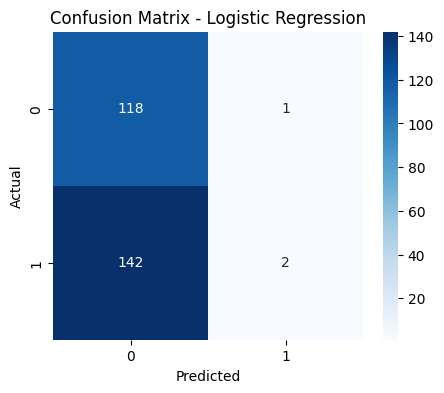

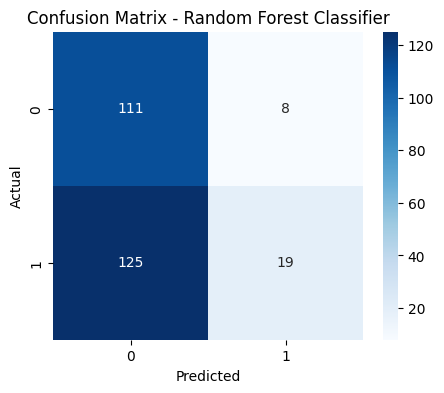

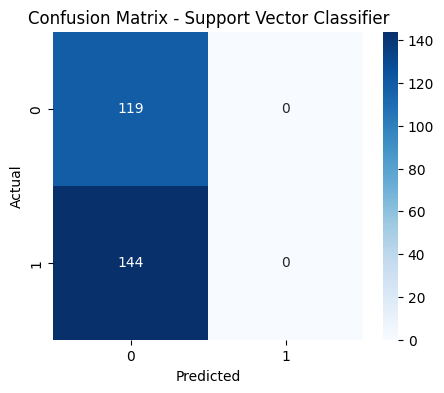

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Example
plot_conf_matrix(y_test, logistic_pred, "Logistic Regression")
plot_conf_matrix(y_test, rf_pred, "Random Forest Classifier")
plot_conf_matrix(y_test, svc_pred, "Support Vector Classifier")
